### CNN Model on MNIST Dataset for Written Digit Classification

In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y),(test_X, test_Y)=mnist.load_data()

In [3]:
print('Train: X=',train_X.shape)
print('Train: Y=',train_Y.shape)
print('Test: X=',test_X.shape)
print('Test: Y=',test_Y.shape)

Train: X= (60000, 28, 28)
Train: Y= (60000,)
Test: X= (10000, 28, 28)
Test: Y= (10000,)


In [4]:
train_X[5].shape

(28, 28)

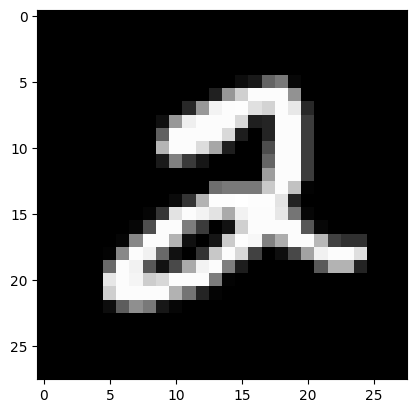

In [5]:
plt.imshow(train_X[5],cmap="gray")

In [6]:
train_Y[5]

2

In [7]:
# Preprocess the data 
image_height, image_width=28,28

In [8]:
train_X=train_X.reshape(60000, image_height*image_width)
test_X=test_X.reshape(10000, image_height*image_width)

print(train_X.shape)
print(test_X.shape)

(60000, 784)
(10000, 784)


In [9]:
print(train_X[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232
  40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15
 152 239 252 252 252 216  31  37 252 252  60   0   

In [10]:
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X/=255.0
test_X/=255.0
print(train_X[5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(train_Y.shape)
print(test_Y.shape)

(60000,)
(10000,)


In [12]:
train_Y=to_categorical(train_Y,10)
test_Y=to_categorical(test_Y,10)
print(train_Y.shape)
print(test_Y.shape)

(60000, 10)
(10000, 10)


In [13]:
train_Y[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# Build a Model
model=Sequential()

model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation="softmax"))

In [15]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history= model.fit(train_X, train_Y, epochs=20, validation_data=(test_X, test_Y))

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1851 - accuracy: 0.9432 - val_loss: 0.1127 - val_accuracy: 0.9624
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0801 - accuracy: 0.9754 - val_loss: 0.0806 - val_accuracy: 0.9746
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0786 - val_accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0732 - val_accuracy: 0.9794
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0907 - val_accuracy: 0.9745
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0871 - val_accuracy: 0.9805
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0853 -

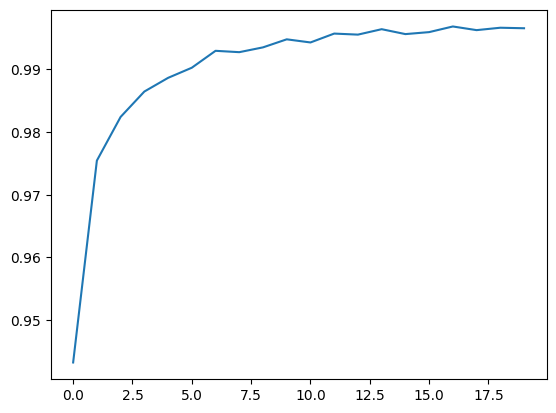

In [17]:
plt.plot(history.history['accuracy'])

In [18]:
score= model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 5ms/step - loss: 0.1505 - accuracy: 0.9806


In [19]:
(train_X, train_Y),(test_X, test_Y)=mnist.load_data()

In [20]:
print('Train: X=',train_X.shape)
print('Train: Y=',train_Y.shape)
print('Test: X=',test_X.shape)
print('Test: Y=',test_Y.shape)

Train: X= (60000, 28, 28)
Train: Y= (60000,)
Test: X= (10000, 28, 28)
Test: Y= (10000,)


In [21]:
train_X=train_X.reshape(60000,28,28,1)
test_X=test_X.reshape(10000,28,28,1)

In [22]:
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')

In [23]:
train_X/=255.0
test_X/=255.0

In [24]:
train_Y=to_categorical(train_Y,10)
test_Y=to_categorical(test_Y,10)

In [25]:
print('Train: X=',train_X.shape)
print('Train: Y=',train_Y.shape)
print('Test: X=',test_X.shape)
print('Test: Y=',test_Y.shape)

Train: X= (60000, 28, 28, 1)
Train: Y= (60000, 10)
Test: X= (10000, 28, 28, 1)
Test: Y= (10000, 10)


#### CNN Model

In [26]:
cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                802880    
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                      

In [29]:
history_cnn=cnn.fit(train_X, train_Y, epochs=12, verbose=1, validation_data=(train_X, train_Y))

Epoch 1/12
1875/1875 [==============================] - 344s 184ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0023 - val_accuracy: 0.9992
Epoch 2/12
1875/1875 [==============================] - 380s 203ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 3/12
1875/1875 [==============================] - 364s 194ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 4/12
1875/1875 [==============================] - 368s 196ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 5/12
1875/1875 [==============================] - 360s 192ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 6/12
1875/1875 [==============================] - 365s 195ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 7/12
1875/1875 [==============================] - 355s 189ms/step - loss: 0.0028 - accuracy: 0.9992 - val_

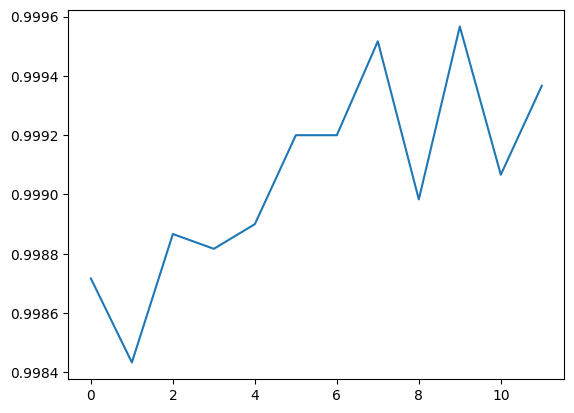

In [30]:
plt.plot(history_cnn.history['accuracy'])

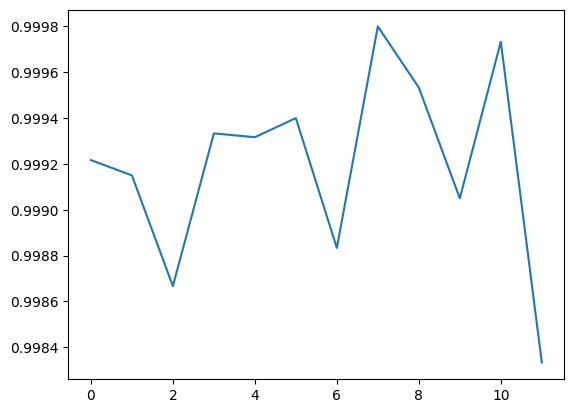

In [31]:
plt.plot(history_cnn.history['val_accuracy'])